<center>
<img src="https://laelgelcpublic.s3.sa-east-1.amazonaws.com/lael_50_years_narrow_white.png.no_years.400px_96dpi.png" width="300" alt="LAEL 50 years logo">
<h3>APPLIED LINGUISTICS GRADUATE PROGRAMME (LAEL)</h3>
</center>
<hr>

# Corpus Linguistics - Study 1 - Phase 1 - Sara

The purpose of this document is to extract a sample of 1000 texts from the [4000 stories with sentiment analysis dataset](https://brunel.figshare.com/articles/dataset/4000_stories_with_sentiment_analysis_dataset/7712540?file=14357549) balanced across `author`.

## What is the `4000 stories with sentiment analysis dataset`?

This dataset presents 4,000 short stories that have been classified in terms of their emotional content and semantic structure. Emotional content was calculated using the valence, arousal and dominance norms in Warriner et al. (2014). Semantic structure was derived using the doc2vec algorithm, which classifies each text as a 300-place vector. The authors created this dataset as part of a study of the impact of narrative literature on mental health.

## Required Python packages

- pandas
- numpy
- seaborn
- matplotlib

## Importing the required libraries

In [1]:
import pandas as pd
import os
import sys
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Define input variables

In [2]:
input_directory = 'cl_st1_ph1_sara'
output_directory = 'cl_st1_ph1_sara'
id = 'short_stories'
dataset_filename_1 = f"{id}_full"
dataset_filename_2 = f"{id}_per_author"
dataset_filename_3 = f"{id}_sample"

## Create output directory

In [3]:
# Check if the output directory already exists. If it does, do nothing. If it doesn't exist, create it.
if os.path.exists(output_directory):
    print('Output directory already exists.')
else:
    try:
        os.makedirs(output_directory)
        print('Output directory successfully created.')
    except OSError as e:
        print('Failed to create the directory:', e)
        sys.exit(1)

Output directory already exists.


## Import the data into a DataFrame

In [4]:
df_short_stories = pd.read_excel(f"{input_directory}/4000-Stories-with-sentiment-analysis.xlsx", engine='openpyxl')

In [5]:
df_short_stories

,Unnamed: 0,url,length,title,text_no,author,story,valence,arousal,dominance,...,290,291,292,293,294,295,296,297,298,299
0,0,https://americanliterature.com/author/eleanor-...,15044,"Peace on Earth, Good-Will to Dogs",0,Eleanor Hallowell Abbott,"PART I\n\nIf you don't like Christmas stories,...",0.592896,0.397839,0.569567,...,3.793141,3.837345,3.778354,-0.815515,-0.720440,-10.738245,-8.765683,0.875089,-10.176691,1.736791
1,1,https://americanliterature.com/author/eleanor-...,10874,The Indiscreet Letter,1,Eleanor Hallowell Abbott,The Railroad Journey was very long and slow. T...,0.593563,0.381156,0.574662,...,-0.309515,3.147870,0.635545,-0.334742,-0.751833,-3.957765,-0.385042,-6.485331,-4.579382,-1.580983
2,2,https://americanliterature.com/author/achmed-a...,6922,An Act of Piety,2,Achmed Abdullah,His affair that night was prosy. He was intend...,0.583742,0.395598,0.566515,...,-9.559562,-1.365196,3.256023,-3.436836,-0.721138,-7.386739,-3.685618,-2.188498,2.970203,3.309226
3,3,https://americanliterature.com/author/achmed-a...,4371,An Indian Jataka,3,Achmed Abdullah,"This is the tale which Jehan Tugluk Khan, a wi...",0.605795,0.404819,0.569258,...,-6.402253,-4.087686,-3.714201,-0.967430,-1.042184,1.208730,6.321670,-4.462947,-4.534634,4.136161
4,4,https://americanliterature.com/author/achmed-a...,3413,Fear,4,Achmed Abdullah,THE fact that the man whom he feared had died ...,0.545548,0.404478,0.546212,...,-0.637324,0.034142,-3.545210,2.767453,0.447380,0.102913,0.755849,-10.680321,-0.472589,-0.216070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4066,4066,https://americanliterature.com/author/emile-zo...,11547,Captain Burle,4072,Emile Zola,CHAPTER I - THE SWINDLE\n\nIt was nine o'clock...,0.558770,0.384706,0.561165,...,2.036475,-1.852210,-2.878432,0.820373,3.333893,1.376029,0.792268,1.079375,-5.319479,-1.326987
4067,4067,https://americanliterature.com/author/emile-zo...,10599,Death of Olivier Becaille,4073,Emile Zola,CHAPTER I - MY PASSING\n\nIt was on a Saturday...,0.553442,0.389239,0.553421,...,-0.221173,-0.417936,-2.129282,0.104781,1.509659,-5.708700,-6.268070,1.555758,-5.677875,3.252067
4068,4068,https://americanliterature.com/author/emile-zo...,16034,Jean Gourdon's Four Days,4074,Emile Zola,"SPRING\n\nOn that particular day, at about fiv...",0.584542,0.387704,0.560985,...,1.309036,-2.229325,-7.380815,8.966954,-0.632408,0.345373,-1.436483,1.364127,-2.963004,-2.288732
4069,4069,https://americanliterature.com/author/emile-zo...,10821,The Fete At Coqueville,4075,Emile Zola,I\n\nCoqueville is a little village planted in...,0.585265,0.388346,0.565073,...,5.175362,0.435068,-6.252507,-1.211361,2.597182,-0.668774,-0.190237,-0.377501,-1.255515,-2.412473


## Inspecting a few rows

In [6]:
df_short_stories.loc[3915, 'author']

'Stewart Edward White'

In [7]:
df_short_stories.loc[3915, 'story']

'During one spring of the early seventies Billy Knapp ran a species of road-house and hotel at the crossing of the Deadwood and Big Horn trails through Custer Valley. Travellers changing from one to the other frequently stopped there over night. He sold accommodations for man and beast, the former comprising plenty of whiskey, the latter plenty of hay. That was the best anyone could say of it. The hotel was of logs, two-storied, with partitions of sheeting to insure a certain privacy of sight if not of sound; had three beds and a number of bunks; and boasted of a woman cook--one of the first in the Hills. Billy did not run it long. He was too restless. For the time being, however, he was interested and satisfied.\n\nThe personnel of the establishment consisted of Billy and the woman, already mentioned, and an ancient Pistol of the name of Charley. The latter wore many firearms, and had a good deal to say, but had never, as Billy expressed it, "made good." This in the West could not be 

In [8]:
df_short_stories.loc[3915, 'processed_text']

"during spring early seventy billy knapp run species road house hotel cross deadwood big horn trail custer valley travellers change frequently stop night he sell accommodation man beast comprise plenty whiskey plenty hay that well the hotel log storied partition sheet insure certain privacy sight sound bed numb bunk boast woman cook hills billy run long he restless for time interest satisfy the personnel establishment consist billy woman mention ancient pistol charley the wear firearm good deal billy express good this west lack opportunity his function general factotum one even billy sit chair tilt wall hotel wait stage by draw charley hobble carry bucket water horse the driver fling rein lordly insolence privilege class descend slowly swagger bar room drink billy follow serve luck say driver crook elbow anything new query billy nope held nope black hank have th limestone that exhaust situation the man puff silently moment pipe in instant driver turn i get tenderfoot remark casually i 

## Add the column `word_count_nltk`

Create a new DataFrame `df_short_stories_2` from `df_short_stories` and add a column `word_count_nltk` with the number of word-like tokens per story using NLTK tokenisation

In [9]:
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

df_short_stories_2 = df_short_stories.copy()
df_short_stories_2['word_count_nltk'] = df_short_stories_2['story'].apply(
    lambda s: sum(1 for tok in word_tokenize(s) if tok.isalnum()) if isinstance(s, str) else 0)
df_short_stories_2

,Unnamed: 0,url,length,title,text_no,author,story,valence,arousal,dominance,...,291,292,293,294,295,296,297,298,299,word_count_nltk
0,0,https://americanliterature.com/author/eleanor-...,15044,"Peace on Earth, Good-Will to Dogs",0,Eleanor Hallowell Abbott,"PART I\n\nIf you don't like Christmas stories,...",0.592896,0.397839,0.569567,...,3.837345,3.778354,-0.815515,-0.720440,-10.738245,-8.765683,0.875089,-10.176691,1.736791,5300
1,1,https://americanliterature.com/author/eleanor-...,10874,The Indiscreet Letter,1,Eleanor Hallowell Abbott,The Railroad Journey was very long and slow. T...,0.593563,0.381156,0.574662,...,3.147870,0.635545,-0.334742,-0.751833,-3.957765,-0.385042,-6.485331,-4.579382,-1.580983,5400
2,2,https://americanliterature.com/author/achmed-a...,6922,An Act of Piety,2,Achmed Abdullah,His affair that night was prosy. He was intend...,0.583742,0.395598,0.566515,...,-1.365196,3.256023,-3.436836,-0.721138,-7.386739,-3.685618,-2.188498,2.970203,3.309226,5543
3,3,https://americanliterature.com/author/achmed-a...,4371,An Indian Jataka,3,Achmed Abdullah,"This is the tale which Jehan Tugluk Khan, a wi...",0.605795,0.404819,0.569258,...,-4.087686,-3.714201,-0.967430,-1.042184,1.208730,6.321670,-4.462947,-4.534634,4.136161,4276
4,4,https://americanliterature.com/author/achmed-a...,3413,Fear,4,Achmed Abdullah,THE fact that the man whom he feared had died ...,0.545548,0.404478,0.546212,...,0.034142,-3.545210,2.767453,0.447380,0.102913,0.755849,-10.680321,-0.472589,-0.216070,3372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4066,4066,https://americanliterature.com/author/emile-zo...,11547,Captain Burle,4072,Emile Zola,CHAPTER I - THE SWINDLE\n\nIt was nine o'clock...,0.558770,0.384706,0.561165,...,-1.852210,-2.878432,0.820373,3.333893,1.376029,0.792268,1.079375,-5.319479,-1.326987,5834
4067,4067,https://americanliterature.com/author/emile-zo...,10599,Death of Olivier Becaille,4073,Emile Zola,CHAPTER I - MY PASSING\n\nIt was on a Saturday...,0.553442,0.389239,0.553421,...,-0.417936,-2.129282,0.104781,1.509659,-5.708700,-6.268070,1.555758,-5.677875,3.252067,6020
4068,4068,https://americanliterature.com/author/emile-zo...,16034,Jean Gourdon's Four Days,4074,Emile Zola,"SPRING\n\nOn that particular day, at about fiv...",0.584542,0.387704,0.560985,...,-2.229325,-7.380815,8.966954,-0.632408,0.345373,-1.436483,1.364127,-2.963004,-2.288732,6038
4069,4069,https://americanliterature.com/author/emile-zo...,10821,The Fete At Coqueville,4075,Emile Zola,I\n\nCoqueville is a little village planted in...,0.585265,0.388346,0.565073,...,0.435068,-6.252507,-1.211361,2.597182,-0.668774,-0.190237,-0.377501,-1.255515,-2.412473,5785


In [10]:
df_short_stories_2_columns = df_short_stories_2.columns.tolist()
print(df_short_stories_2_columns)

['Unnamed: 0', 'url', 'length', 'title', 'text_no', 'author', 'story', 'valence', 'arousal', 'dominance', 'text_id', 'processed_text', 'word_count', 'sentence_length', 'string_length', 'unique_words', 'lexical_diversity', 'concrete', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '

In [11]:
# Reorder the columns to place the `word_count_nltk` column after the `word_count` column
df_short_stories_2 = df_short_stories_2[['Unnamed: 0', 'url', 'length', 'title', 'text_no', 'author', 'story', 'valence', 'arousal', 'dominance', 'text_id', 'processed_text', 'word_count', 'word_count_nltk'] + [col for col in df_short_stories_2.columns if col not in ['Unnamed: 0', 'url', 'length', 'title', 'text_no', 'author', 'story', 'valence', 'arousal', 'dominance', 'text_id', 'processed_text', 'word_count', 'word_count_nltk']]]

In [12]:
df_short_stories_2

,Unnamed: 0,url,length,title,text_no,author,story,valence,arousal,dominance,...,290,291,292,293,294,295,296,297,298,299
0,0,https://americanliterature.com/author/eleanor-...,15044,"Peace on Earth, Good-Will to Dogs",0,Eleanor Hallowell Abbott,"PART I\n\nIf you don't like Christmas stories,...",0.592896,0.397839,0.569567,...,3.793141,3.837345,3.778354,-0.815515,-0.720440,-10.738245,-8.765683,0.875089,-10.176691,1.736791
1,1,https://americanliterature.com/author/eleanor-...,10874,The Indiscreet Letter,1,Eleanor Hallowell Abbott,The Railroad Journey was very long and slow. T...,0.593563,0.381156,0.574662,...,-0.309515,3.147870,0.635545,-0.334742,-0.751833,-3.957765,-0.385042,-6.485331,-4.579382,-1.580983
2,2,https://americanliterature.com/author/achmed-a...,6922,An Act of Piety,2,Achmed Abdullah,His affair that night was prosy. He was intend...,0.583742,0.395598,0.566515,...,-9.559562,-1.365196,3.256023,-3.436836,-0.721138,-7.386739,-3.685618,-2.188498,2.970203,3.309226
3,3,https://americanliterature.com/author/achmed-a...,4371,An Indian Jataka,3,Achmed Abdullah,"This is the tale which Jehan Tugluk Khan, a wi...",0.605795,0.404819,0.569258,...,-6.402253,-4.087686,-3.714201,-0.967430,-1.042184,1.208730,6.321670,-4.462947,-4.534634,4.136161
4,4,https://americanliterature.com/author/achmed-a...,3413,Fear,4,Achmed Abdullah,THE fact that the man whom he feared had died ...,0.545548,0.404478,0.546212,...,-0.637324,0.034142,-3.545210,2.767453,0.447380,0.102913,0.755849,-10.680321,-0.472589,-0.216070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4066,4066,https://americanliterature.com/author/emile-zo...,11547,Captain Burle,4072,Emile Zola,CHAPTER I - THE SWINDLE\n\nIt was nine o'clock...,0.558770,0.384706,0.561165,...,2.036475,-1.852210,-2.878432,0.820373,3.333893,1.376029,0.792268,1.079375,-5.319479,-1.326987
4067,4067,https://americanliterature.com/author/emile-zo...,10599,Death of Olivier Becaille,4073,Emile Zola,CHAPTER I - MY PASSING\n\nIt was on a Saturday...,0.553442,0.389239,0.553421,...,-0.221173,-0.417936,-2.129282,0.104781,1.509659,-5.708700,-6.268070,1.555758,-5.677875,3.252067
4068,4068,https://americanliterature.com/author/emile-zo...,16034,Jean Gourdon's Four Days,4074,Emile Zola,"SPRING\n\nOn that particular day, at about fiv...",0.584542,0.387704,0.560985,...,1.309036,-2.229325,-7.380815,8.966954,-0.632408,0.345373,-1.436483,1.364127,-2.963004,-2.288732
4069,4069,https://americanliterature.com/author/emile-zo...,10821,The Fete At Coqueville,4075,Emile Zola,I\n\nCoqueville is a little village planted in...,0.585265,0.388346,0.565073,...,5.175362,0.435068,-6.252507,-1.211361,2.597182,-0.668774,-0.190237,-0.377501,-1.255515,-2.412473


## Export to a file

In [13]:
df_short_stories_2.to_json(f"{output_directory}/{dataset_filename_1}.jsonl", orient='records', lines=True)

## Determine how many stories per author should be considered to obtain a sample of about 1,000 stories

List the number of stories per author in descending order

In [14]:
df_stories_per_author = (
    df_short_stories_2
    .groupby('author', dropna=False)
    .size()
    .reset_index(name='story_count')
    .sort_values(['story_count', 'author'], ascending=[False, True])
    .reset_index(drop=True)
)

Create the `balanced_story_count` column with the number of authors (`index` plus 1) times the number of stories per author

In [15]:
df_stories_per_author['balanced_story_count'] = (df_stories_per_author.index + 1) * df_stories_per_author['story_count']
df_stories_per_author

,author,story_count,balanced_story_count
0,O Henry,256,256
1,Guy De Maupassant,188,376
2,Rudyard Kipling,180,540
3,Jack London,176,704
4,Aesop,160,800
...,...,...,...
208,Wb Laughead,1,209
209,William Carlos Williams,1,210
210,William Darcy Haley,1,211
211,William Faulkner,1,212


## Export to a file

In [16]:
df_stories_per_author.to_json(f"{output_directory}/{dataset_filename_2}.jsonl", orient='records', lines=True)

In [17]:
df_stories_per_author.to_excel(f"{output_directory}/{dataset_filename_2}.xlsx", index=False)

Conclusion: Stewart Edward White has 13 stories and is the 79th author on the list. If we randomly select 13 stories from each of the authors that precede him, we will have a balanced sample with 1,027 stories (79 authors with 13 stories each = 1,027 stories.

## Exclude the authors who come after Stewart Edward White

Create a Python list of author names from `df_stories_per_author` starting at positional index 79 through the end (0-based indexing)

In [18]:
authors_from_79 = df_stories_per_author.iloc[79:]['author'].tolist()
authors_from_79

['Ethel M Dell',
 'Mary Hallock Foote',
 'Willa Cather',
 'Franz Kafka',
 'Nikolai Vasilievich Gogol',
 'Zane Grey',
 'Clara Dillingham Pierson',
 'Edward Payson Roe',
 'Frank Norris',
 'Ivan S Turgenev',
 'Sarah Orne Jewett',
 'Charles W Chesnutt',
 'Harriet Prescott Spofford',
 'Leonid Andreyev',
 'Walter Mcroberts',
 'Robert W Chambers',
 'Virginia Woolf',
 'Alexsander Pushkin',
 'Amelia B Edwards',
 'Anonymous',
 'Fyodor Dostoevsky',
 'Gk Chesterton',
 'Henry James',
 'Kate Dickinson Sweetser',
 'Mary Shelley',
 'Achmed Abdullah',
 'Anzia Yezierska',
 'Ring Lardner',
 'Thomas Nelson Page',
 'Aldous Huxley',
 'Emile Zola',
 'Fredric Brown',
 'George Ade',
 'Paul Laurence Dunbar',
 'Ray Bradbury',
 'Richmal Crompton',
 'Alexander Kielland',
 'Arabian Nights',
 'Arnaba Saha',
 'Carl Sandburg',
 'Cornelia A P Comer',
 'Elizabeth Stuart Phelps',
 'Gertrude Atherton',
 'James Fenimore Cooper',
 'Lafcadio Hearn',
 'Thomas Bailey Aldrich',
 'Vsevolod Garshin',
 'Albert F Blaisdell',
 'Arth

Slice the `df_short_stories_2` DataFrame by excluding the authors in the `authors_from_79` list

In [19]:
df_short_stories_sample = df_short_stories_2[~df_short_stories_2['author'].isin(authors_from_79)].copy()
df_short_stories_sample

,Unnamed: 0,url,length,title,text_no,author,story,valence,arousal,dominance,...,290,291,292,293,294,295,296,297,298,299
8,8,https://americanliterature.com/author/andy-ada...,4373,A College Vagabond,8,Andy Adams,The ease and apparent willingness with which s...,0.605144,0.375119,0.581012,...,6.536303,-1.076504,-4.150177,1.438044,2.262930,0.156003,2.598872,2.294365,-6.829527,2.262013
9,9,https://americanliterature.com/author/andy-ada...,2328,A Question of Possession,9,Andy Adams,Along in the 80's there occurred a question of...,0.557645,0.386544,0.553294,...,4.110169,-3.189352,-4.496370,6.381891,3.467398,4.405526,-3.719023,5.771093,-7.057388,-4.668538
10,10,https://americanliterature.com/author/andy-ada...,5767,Around the Spade Wagon,10,Andy Adams,It was an early spring. The round-up was set f...,0.580115,0.375252,0.572286,...,0.883846,-0.229184,-3.641300,7.416651,2.058722,2.323213,-1.987143,-3.440974,-10.600903,0.445560
11,11,https://americanliterature.com/author/andy-ada...,6187,At Comanche Ford,11,Andy Adams,"""There's our ford,"" said Juan,--our half-blood...",0.566928,0.386464,0.556384,...,3.312181,0.269631,-5.844995,2.563570,3.835022,-1.948140,1.396191,-0.237618,-2.303612,-7.179595
12,12,https://americanliterature.com/author/andy-ada...,3956,A Winter Round-Up,12,Andy Adams,An hour before daybreak one Christmas morning ...,0.553099,0.388304,0.550178,...,6.440938,-0.011963,-4.934225,0.029121,-1.203348,2.639738,3.015192,3.250856,-1.021182,0.225383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4061,4061,https://americanliterature.com/author/charlott...,6629,The Vendeans,4067,Charlotte M Yonge,1793\n\nWhile the greater part of France had b...,0.552342,0.398422,0.557510,...,1.299584,-0.708645,-9.801194,3.652873,0.685009,3.017546,3.262835,-1.359882,-0.146675,6.019684
4062,4062,https://americanliterature.com/author/charlott...,2269,The Voluntary Convict,4068,Charlotte M Yonge,"1622\n\nIn the early summer of the year 1605, ...",0.558963,0.391962,0.551518,...,1.661613,2.323468,-3.904744,-4.302940,-1.337990,-2.691222,-1.899400,-3.540752,-1.506574,2.806071
4063,4063,https://americanliterature.com/author/charlott...,4764,Under Ivan The Terrible,4069,Charlotte M Yonge,1564.\n\nPrince Andrej Kourbsky was one of the...,0.549834,0.401437,0.547320,...,-1.257698,-4.641952,-9.627635,0.235236,-2.560084,0.483780,-0.718816,-0.880648,-2.731592,-0.322533
4064,4064,https://americanliterature.com/author/charlott...,2136,What Is Better Than Slaying A Dragon,4070,Charlotte M Yonge,1332\n\nThe next story we have to tell is so s...,0.560860,0.402855,0.545586,...,4.967878,0.114041,-3.679895,-1.556168,1.064400,1.887698,-5.821985,2.804210,-0.025481,1.712860


## Randomly select 13 stories per author

Create `df_short_stories_sample_balanced` by randomly selecting 13 stories per author from `df_short_stories_sample` (only authors with at least 13 stories), using a fixed random seed for reproducibility.

In [20]:
df_counts = df_short_stories_sample['author'].value_counts()
eligible_authors = df_counts[df_counts >= 13].index

df_short_stories_sample_balanced = (
    df_short_stories_sample[df_short_stories_sample['author'].isin(eligible_authors)]
    .groupby('author', group_keys=False)
    .sample(n=13, random_state=42)
    .reset_index(drop=True)
)

In [21]:
df_short_stories_sample_balanced

,Unnamed: 0,url,length,title,text_no,author,story,valence,arousal,dominance,...,290,291,292,293,294,295,296,297,298,299
0,132,https://americanliterature.com/author/aesop/sh...,221,The North Wind And The Sun,132,Aesop,The North Wind and the Sun had a quarrel about...,0.585298,0.387656,0.552912,...,-0.725636,1.394525,-0.368660,-0.826216,-0.404107,-2.155604,-0.588620,0.973611,-2.615558,0.553259
1,135,https://americanliterature.com/author/aesop/sh...,177,The Old Lion And The Fox,135,Aesop,"An old Lion, whose teeth and claws were so wor...",0.587802,0.363851,0.564274,...,0.145314,1.034455,-0.064793,1.255505,0.769680,-1.843839,0.995360,0.018675,-1.764984,0.828983
2,168,https://americanliterature.com/author/aesop/sh...,106,The Wolf And His Shadow,168,Aesop,A Wolf left his lair one evening in fine spiri...,0.590865,0.421795,0.546891,...,0.382515,-0.318968,-0.942457,0.360232,0.787340,-1.171910,-0.509171,1.422981,-1.376268,-1.527520
3,82,https://americanliterature.com/author/aesop/sh...,112,The Fisherman And The Little Fish,82,Aesop,"A poor Fisherman, who lived on the fish he cau...",0.597643,0.376679,0.572071,...,0.138883,1.211297,-3.004760,2.127642,0.658984,-0.186210,-0.706608,0.228234,0.382039,0.997938
4,121,https://americanliterature.com/author/aesop/sh...,209,The Milkmaid And Her Pail,121,Aesop,A Milkmaid had been out to milk the cows and w...,0.640016,0.367127,0.596039,...,1.014141,-0.345629,-3.271987,1.199389,0.168956,-0.972629,-0.391940,-0.877817,-0.908842,1.096065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,3510,https://americanliterature.com/author/william-...,14982,Little Travels and Roadside Sketches,3516,William Makepeace Thackeray,I.--FROM RICHMOND IN SURREY TO BRUSSELS IN BEL...,0.596104,0.379743,0.577125,...,1.542540,-7.371615,3.092734,0.084932,6.703400,-5.958669,-0.188090,-1.783051,5.863551,1.357288
1023,3505,https://americanliterature.com/author/william-...,10613,A Little Dinner at Timmins's,3511,William Makepeace Thackeray,I.\n\nMr. and Mrs. Fitzroy Timmins live in Lil...,0.604349,0.376993,0.589788,...,-3.373559,-0.968249,1.947709,3.599812,7.668527,2.874549,2.313843,4.147356,0.830020,0.527882
1024,3508,https://americanliterature.com/author/william-...,3434,Henry Esmond's Boyhood,3514,William Makepeace Thackeray,Harry Esmond had lived to be past fourteen yea...,0.592878,0.403702,0.570518,...,1.435788,2.874984,-5.998650,5.482394,-2.186995,3.701814,-1.185955,0.035730,-0.906341,-1.068626
1025,3515,https://americanliterature.com/author/william-...,18504,The Fatal Boots,3521,William Makepeace Thackeray,JANUARY.--THE BIRTH OF THE YEAR.\n\nSome poet ...,0.589198,0.392761,0.576866,...,-2.788763,-2.552873,-4.295826,4.502931,7.719763,2.389626,-2.249530,1.418498,-0.390615,0.607732


## Export to a file

This is the balanced sample.

In [22]:
df_short_stories_sample_balanced.to_json(f"{output_directory}/{dataset_filename_3}.jsonl", orient='records', lines=True)

In [23]:
df_short_stories_sample_balanced.to_excel(f"{output_directory}/{dataset_filename_3}.xlsx", index=False)

## Descriptive statistics for `word_count_nltk` in `df_short_stories_sample_balanced`

Descriptive statistics for word_count_nltk:
- Count: 1027
- Mean: 3828.87
- Std (sample): 1792.04
- Min: 20
- Q1 (25%): 2335.00
- Median (50%): 3943.00
- Q3 (75%): 5628.50
- Max: 6452

IQR outlier thresholds:
- Lower fence: -2605.25
- Upper fence: 10568.75
Outliers found: 0


,author,title,word_count_nltk


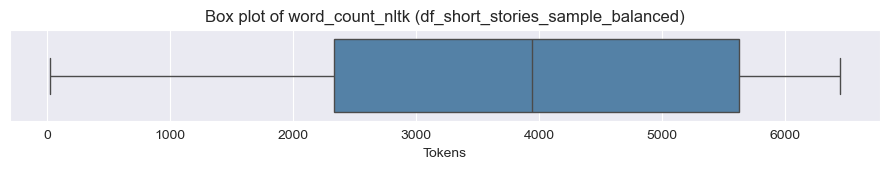

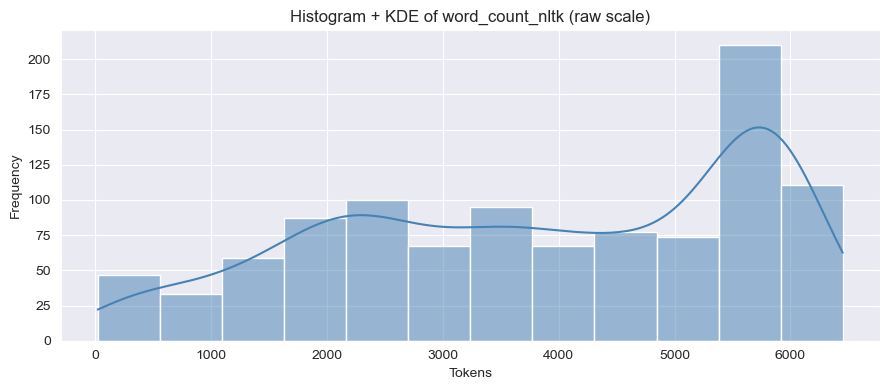

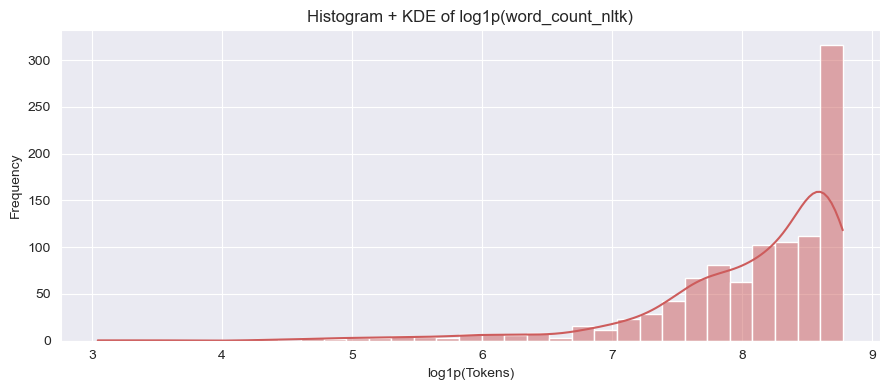

In [24]:
# Select the series
series = df_short_stories_sample_balanced['word_count_nltk'].dropna()

# Summary stats
mean_val = series.mean()
std_val = series.std(ddof=1)  # sample standard deviation
desc = series.describe()  # count, mean, std, min, 25%, 50%, 75%, max

print("Descriptive statistics for word_count_nltk:")
print(f"- Count: {int(desc['count'])}")
print(f"- Mean: {mean_val:.2f}")
print(f"- Std (sample): {std_val:.2f}")
print(f"- Min: {int(desc['min'])}")
print(f"- Q1 (25%): {desc['25%']:.2f}")
print(f"- Median (50%): {desc['50%']:.2f}")
print(f"- Q3 (75%): {desc['75%']:.2f}")
print(f"- Max: {int(desc['max'])}")

# IQR-based outlier detection
q1, q3 = series.quantile([0.25, 0.75])
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

outlier_mask = (series < lower_fence) | (series > upper_fence)
outliers = (
    df_short_stories_sample_balanced.loc[outlier_mask, ['author', 'title', 'word_count_nltk']]
    .sort_values('word_count_nltk')
    .reset_index(drop=True)
)

print(f"\nIQR outlier thresholds:")
print(f"- Lower fence: {lower_fence:.2f}")
print(f"- Upper fence: {upper_fence:.2f}")
print(f"Outliers found: {len(outliers)}")
display(outliers.head(10))  # show a preview

# Box plot
plt.figure(figsize=(9, 1.8))
sns.boxplot(x=series, color='steelblue')
plt.title('Box plot of word_count_nltk (df_short_stories_sample_balanced)')
plt.xlabel('Tokens')
plt.tight_layout()

# Saving the plot
plt.savefig(f"{output_directory}/{dataset_filename_3}_boxplot.png", dpi=300)

plt.show()

# Raw scale: Histogram + KDE
plt.figure(figsize=(9, 4))
sns.histplot(series, bins='auto', kde=True, color='steelblue')
plt.title('Histogram + KDE of word_count_nltk (raw scale)')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.tight_layout()

# Saving the plot
plt.savefig(f"{output_directory}/{dataset_filename_3}_histogram.png", dpi=300)

plt.show()

# Log scale via transformation: Histogram + KDE
log_series = np.log1p(series)  # log(1 + x) to handle zeros safely
plt.figure(figsize=(9, 4))
sns.histplot(log_series, bins='auto', kde=True, color='indianred')
plt.title('Histogram + KDE of log1p(word_count_nltk)')
plt.xlabel('log1p(Tokens)')
plt.ylabel('Frequency')
plt.tight_layout()

# Saving the plot
plt.savefig(f"{output_directory}/{dataset_filename_3}_histogram_log_scale.png", dpi=300)

plt.show()

Interpretation:
- Most stories cluster between ~2.3k and ~5.6k tokens, but there are some very short texts that pull the mean below the median
- There’s no evidence of unusually long stories by the standard IQR (Interquartile Range) rule; the upper tail is present but not extreme
- For downstream comparisons (e.g., across authors), the wide IQR suggests meaningful differences in typical length could exist by subgroup